### Import libraries:

In [1]:
import matplotlib.pyplot as plt

import numpy as np
from numpy import expand_dims

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img



# This notebook provides an environment to test the different models generated by different train datasets. 

1. Kies het model welke je wilt gebruiken voor de 'Confusion Matrix'
2. Evalueer de 'test accuracy'
3. De geschreven functie van een 'Confusion Matrix'
4. Genereer een 'Confusion Matrix'

## 1. Kies het model welke je wilt gebruiken voor de 'Confusion Matrix'

In [2]:
# model1 = load_model('models/cleanedAndAugumented_M3_100px.h5')
# img_height = 100
# img_width = 100

# model2 = load_model('models/cleanedAndAugumented_470images_M3_180px.h5')
# img_height = 180
# img_width = 180

# model3 = load_model('models/cleanedAndAugumented_470images_M3_256px.h5')
# img_height = 256 
# img_width = 256

# model4 = load_model('models/cleanedAndAugumented_470images_M3_180px.h5')
# img_height = 180
# img_width = 180

# model5 = load_model('models/cleanedAndAugumented_470images_M3_256px.h5')
# img_height = 256
# img_width = 256

# model6 = load_model('models/cleanedAndAugumented_470images_M2_256px.h5')
# img_height = 256
# img_width = 256

# model7 = load_model('models/Train_DataPieterAugumented_100px.h5')
# img_height = 100
# img_width = 100

# model8 = load_model('models/Train_augumented_dataset_M2_180.h5')
# img_height = 180
# img_width = 180

# model9 = load_model('models/Train_augumented_dataset_M2_augLayer_180.h5')
# img_height = 180
# img_width = 180

# model10 = load_model('models/Train_augumented_dataset_M3_auglayer_256px.h5.h5')
# img_height = 256
# img_width = 256

MobileNetV2 = load_model('models/mobileNetV2_256px.h5')
img_height = 256
img_width = 256

batch_size = 32

2022-11-18 16:04:18.951533: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 2. Evalueer de 'test accuracy'

In [3]:
data_dir = 'data/Test'

test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 120 files belonging to 4 classes.


In [4]:
scores = MobileNetV2.evaluate(test_ds)

4/4 [==============================] - 8s 2s/step - loss: 0.9706 - accuracy: 0.8083


## 3. De geschreven functie van een 'Confusion Matrix'

Door de 'Confusion Martrix' in een functie te schrijven kan ik de functie makkelijk aanroepen per model. Zeker met het aantal modellen ik heb is dit geen overbodige luxe.

In [21]:
def confusionMatrix(model, img_height, img_width, test_data_dir = 'data/Test'):
  
  test_ds = tf.keras.utils.image_dataset_from_directory(
      test_data_dir,
      shuffle=False,
      image_size=(img_height, img_width),
      batch_size = batch_size)
  test_label = test_ds.class_names
  print(test_label)
  
  batchPredictions = model.predict(test_ds)
  predicted_categories = tf.argmax(batchPredictions, axis=1)
  true_categories = tf.concat([y for x, y in test_ds], axis=0)
  result_confusion_matrix = confusion_matrix(true_categories, predicted_categories)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = result_confusion_matrix, display_labels = ['Blotch', 'Normal', 'Rot', 'Scab'])

  cm_display.plot()
  plt.show()

 

## 4. Genereer een 'Confusion Matrix'

Selecteer wederom het model het model. Let er op dat deze overeenkomt met de ingeladen data. Data van model1 hoort bij confusionMatrix1, model2 bij confusionMatrix2 en zo door. 

In [6]:
# confusionMatrix(model1, 100, 100)

In [7]:
# confusionMatrix(model2, 180, 180)

In [8]:
# confusionMatrix(model3, 256, 256)

In [9]:
# confusionMatrix(model4, 180, 180)

In [10]:
# confusionMatrix(model5, 256, 256)

In [11]:
# confusionMatrix(model6, 256, 256)

In [12]:
# confusionMatrix(model7, 100, 100)

In [13]:
# confusionMatrix(model8, 180, 180)

In [14]:
# confusionMatrix(model9, 180, 180)

Found 120 files belonging to 4 classes.
['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']


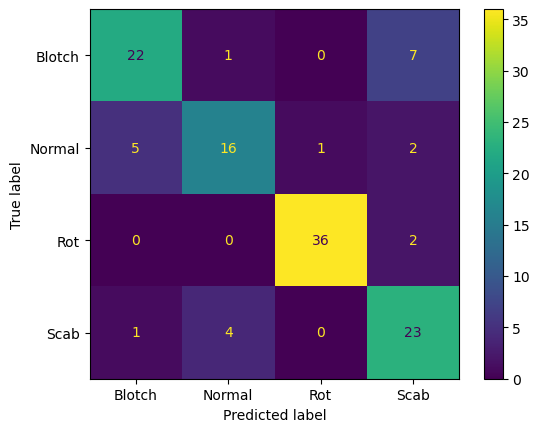

array([[22,  1,  0,  7],
       [ 5, 16,  1,  2],
       [ 0,  0, 36,  2],
       [ 1,  4,  0, 23]])

In [25]:
confusionMatrix(MobileNetV2, 256, 256)